In [1]:
library(stringr)

In [2]:
dir_train = 'data/train.csv'
dir_test = 'data/test.csv'
train.df = read.csv(dir_train,header=TRUE,sep=',')
test.df = read.csv(dir_test,header=TRUE,sep=',')

In [3]:
head(train.df,5)

,Labels,Text,Text_Tag
,<int>,<chr>,<chr>
1,1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
4,1,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
5,2,The economic turnaround started at the end of my term.,"economy,jobs"


In [4]:
head(test.df,5)

,Text,Text_Tag
,<chr>,<chr>
1,Building a wall on the U.S.-Mexico border will take literally years.,immigration
2,Wisconsin is on pace to double the number of layoffs this year.,jobs
3,Says John McCain has done nothing to help the vets.,"military,veterans,voting-record"
4,Suzanne Bonamici supports a plan that will cut choice for Medicare Advantage seniors.,"medicare,message-machine-2012,campaign-advertising"
5,"When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes.","campaign-finance,legal-issues,campaign-advertising"


In [187]:
plain <- function(word){
    word = str_to_lower(str_remove_all(word,'[.:;!?*@#()]'))
    return(word) 
}

get.tags <- function (tags.bag,sep,sortit=FALSE) {
    all.tags = c()
    for (record in tags.bag){
        temp.tags = str_split_1(record,sep)
        for (word in temp.tags) {
            word = plain(word)
            if (word %in% all.tags == FALSE & word != '') {
                    all.tags = c(all.tags,str_to_lower(word))
                } 
            }
        }
    if (sortit) {all.tags = sort(all.tags)}
    return(all.tags)
}

get.quotes <- function (quotes.bag,sep) {
    all.quotes = list()
    for (record in quotes.bag){
        temp.q = plain(str_split_1(record,sep))
        
        all.quotes = c(all.quotes,temp.q)
        }

    return(all.quotes)
}

In [53]:
train.tags = get.tags(train.df$Text_Tag,sep=',',sortit=TRUE)
test.tags = get.tags(test.df$Text_Tag,sep=',',sortit=TRUE)    
vocabulray = get.tags(train.df$Text,sep=' ')

In [188]:
quotes = get.quotes(test.df$Text,sep=' ')

In [189]:
quotes[2]

[[1]]
[1] "a"

In [153]:
test.tags

[1] "abc-news-week"            "abortion"                
  [3] "afghanistan"              "agriculture"             
  [5] "alcohol"                  "animals"                 
  [7] "bankruptcy"               "baseball"                
  [9] "bipartisanship"           "bush-administration"     
 [11] "campaign-advertising"     "campaign-finance"        
 [13] "candidates-biography"     "cap-and-trade"           
 [15] "census"                   "children"                
 [17] "china"                    "city-budget"             
 [19] "city-government"          "civil-rights"            
 [21] "climate-change"           "congress"                
 [23] "congressional-rules"      "consumer-safety"         
 [25] "corporations"             "corrections-and-updates" 
 [27] "county-budget"            "county-government"       
 [29] "crime"                    "criminal-justice"        
 [31] "debates"                  "debt"                    
 [33] "deficit"                  "disability"              
 [35] "diversity"                "drugs"                   
 [37] "ebola"                    "economy"                 
 [39] "education"                "elections"               
 [41] "energy"                   "environment"             
 [43] "ethics"                   "fake-news"               
 [45] "families"                 "federal-budget"          
 [47] "financial-regulation"     "florida"                 
 [49] "food-safety"              "foreign-policy"          
 [51] "gambling"                 "gas-prices"              
 [53] "gays-and-lesbians"        "government-efficiency"   
 [55] "government-regulation"    "guns"                    
 [57] "health-care"              "history"                 
 [59] "homeland-security"        "housing"                 
 [61] "human-rights"             "hunger"                  
 [63] "immigration"              "income"                  
 [65] "infrastructure"           "iraq"                    
 [67] "islam"                    "israel"                  
 [69] "job-accomplishments"      "jobs"                    
 [71] "kagan-nomination"         "labor"                   
 [73] "legal-issues"             "marijuana"               
 [75] "market-regulation"        "marriage"                
 [77] "medicaid"                 "medicare"                
 [79] "message-machine"          "message-machine-2012"    
 [81] "message-machine-2014"     "military"                
 [83] "natural-disasters"        "new-hampshire-2012"      
 [85] "nightlife"                "nuclear"                 
 [87] "obama-birth-certificate"  "occupy-wall-street"      
 [89] "oil-spill"                "patriotism"              
 [91] "pensions"                 "politifacts-top-promises"
 [93] "polls"                    "pop-culture"             
 [95] "population"               "poverty"                 
 [97] "privacy"                  "public-health"           
 [99] "public-safety"            "public-service"          
[101] "pundits"                  "recreation"              
[103] "redistricting"            "religion"                
[105] "retirement"               "science"                 
[107] "sexuality"                "small-business"          
[109] "social-security"          "sotomayor-nomination"    
[111] "space"                    "sports"                  
[113] "state-budget"             "state-finances"          
[115] "states"                   "stimulus"                
[117] "supreme-court"            "taxes"                   
[119] "technology"               "terrorism"               
[121] "tourism"                  "trade"                   
[123] "transparency"             "transportation"          
[125] "unions"                   "urban"                   
[127] "veterans"                 "voting-record"           
[129] "water"                    "wealth"                  
[131] "weather"                  "welfare"                 
[133] "women"                    "workers"

In [182]:
pippier = c('I,don,kno!')
PL = str_split_1(pippier,',')
pl = plain(PL)
pl

[1] "i"   "don" "kno"

In [57]:
length(vocabulray)

[1] 20043

In [58]:
train.df$Text[1]

[1] "Says the Annies List political group supports third-trimester abortions on demand."

In [59]:
vocabulray[1:15]

[1] "says"            "the"             "annies"          "list"           
 [5] "political"       "group"           "supports"        "third-trimester"
 [9] "abortions"       "on"              "demand."         "when"           
[13] "did"             "decline"         "of"

In [46]:
'job' %in% vocabulray

[1] TRUE

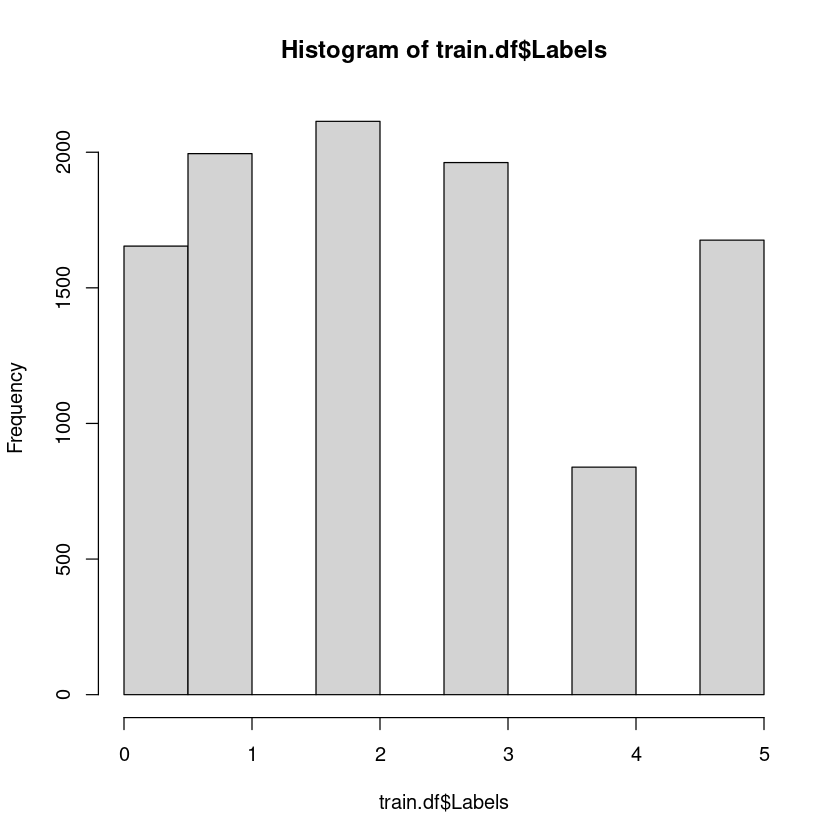

In [49]:
hist(train.df$Labels)

In [51]:
str_to_lower('BaGheRaAAa')

[1] "bagheraaaa"